In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')
df = df[df['CRASH_DATE'].dt.year >= 2022]

create binary columns, sum up all binaries

rule based approach

consult US federal and state laws for severe accident

In [32]:
def rule(row):
    if row['INJURIES_FATAL'] > 0:
        return 1
    elif row['INJURIES_INCAPACITATING'] > 0:
        return 1
    elif row['NUM_UNITS'] >= 3:
        return 1
    elif row['HIT_AND_RUN_I'] == 'Y':
        return 1
    else:
        return 0

df['SEVERE_ACCIDENT'] = df.apply(rule, axis=1)

In [33]:
df['SEVERE_ACCIDENT'].value_counts()

SEVERE_ACCIDENT
0    135999
1     83470
Name: count, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['DAMAGE'] = label_encoder.fit_transform(df['DAMAGE'])
df['DAMAGE'] += 1

weighted_average = (df['DAMAGE'] + df['NUM_UNITS'] + (df['INJURIES_TOTAL'] + df['INJURIES_FATAL'] + df['INJURIES_INCAPACITATING'] + df['INJURIES_NON_INCAPACITATING'] + df['INJURIES_NO_INDICATION'])) / (5)

weighted_average_normalized = (weighted_average - weighted_average.min()) / (weighted_average.max() - weighted_average.min())

print(weighted_average_normalized)
df['WEIGHTED_AVERAGE_SEVERITY'] = weighted_average_normalized

297970    0.130435
279007    0.260870
694710    0.217391
507318    0.217391
597219    0.173913
            ...   
60669     0.173913
556500    0.173913
735583    0.173913
247075    0.130435
526136    0.086957
Length: 7950, dtype: float64


<Axes: >

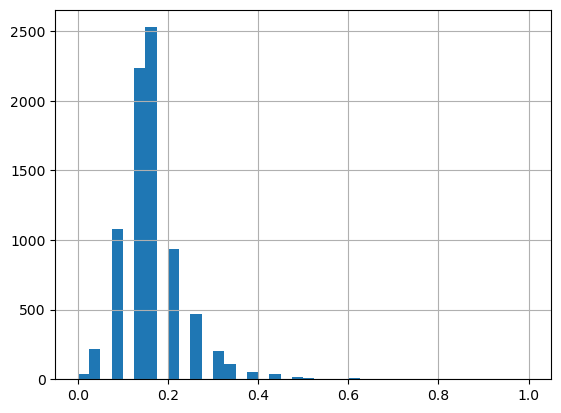

In [95]:
df['WEIGHTED_AVERAGE_SEVERITY'].hist(bins=40)

In [96]:
num_units = df['NUM_UNITS']
damage = df['DAMAGE']

if "INJURIES_TOTAL" in df.columns:
    df.drop(['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_NO_INDICATION'], axis=1, inplace=True)
    df.drop(['CRASH_RECORD_ID'], inplace=True, axis=1)

df.head()

,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,MOST_SEVERE_INJURY,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,WEIGHTED_AVERAGE_SEVERITY
297970,Y,08/15/2023 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NO INDICATION OF INJURY,0.0,0.0,0,3,8,41.889458,-87.620368,POINT (-87.620368376429 41.889458280109),0.130435
279007,NaN,11/22/2019 04:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,...,NO INDICATION OF INJURY,0.0,0.0,16,6,11,41.749567,-87.605128,POINT (-87.605127844827 41.749567127561),0.260870
694710,NaN,04/09/2023 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",HEAD ON,NOT DIVIDED,NaN,...,NO INDICATION OF INJURY,0.0,0.0,1,1,4,41.882451,-87.757430,POINT (-87.757429660309 41.882450762005),0.217391
507318,NaN,08/08/2017 03:00:00 PM,0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,UNKNOWN,NaN,...,NO INDICATION OF INJURY,0.0,0.0,15,3,8,41.828718,-87.724321,POINT (-87.724320604623 41.828718064452),0.217391
597219,NaN,12/01/2018 03:40:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,REAR END,NOT DIVIDED,2.0,...,NO INDICATION OF INJURY,0.0,0.0,15,7,12,41.938847,-87.644505,POINT (-87.644505229808 41.938846966225),0.173913


In [97]:
nan_percentage = df.isna().mean() * 100
print(nan_percentage)

def drop_columns_with_high_na(df, threshold_percentage):
    nan_percentage = df.isna().mean() * 100
    columns_to_drop = nan_percentage[nan_percentage > threshold_percentage].index
    df.drop(columns_to_drop, axis=1, inplace=True)
    return df

df = drop_columns_with_high_na(df, 50)

df.dropna(how='any', inplace=True)


df.head()

CRASH_DATE_EST_I                 92.415094
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
LANE_CNT                         74.628931
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       2.918239
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           77.094340
NOT_RIGHT_OF_WAY_I               95.333333
HIT_AND_RUN_I                    68.188679
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO                         0.000000
STREET_DIRE

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,MOST_SEVERE_INJURY,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,WEIGHTED_AVERAGE_SEVERITY
297970,08/15/2023 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,...,NO INDICATION OF INJURY,0.0,0.0,0,3,8,41.889458,-87.620368,POINT (-87.620368376429 41.889458280109),0.130435
279007,11/22/2019 04:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,0.0,0.0,16,6,11,41.749567,-87.605128,POINT (-87.605127844827 41.749567127561),0.260870
694710,04/09/2023 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",HEAD ON,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,0.0,0.0,1,1,4,41.882451,-87.757430,POINT (-87.757429660309 41.882450762005),0.217391
507318,08/08/2017 03:00:00 PM,0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,UNKNOWN,STRAIGHT AND LEVEL,UNKNOWN,...,NO INDICATION OF INJURY,0.0,0.0,15,3,8,41.828718,-87.724321,POINT (-87.724320604623 41.828718064452),0.217391
597219,12/01/2018 03:40:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,WET,...,NO INDICATION OF INJURY,0.0,0.0,15,7,12,41.938847,-87.644505,POINT (-87.644505229808 41.938846966225),0.173913


In [98]:
if "CRASH_DATE" in df.columns:
    df["CRASH_DATE"] = pd.to_datetime(df["CRASH_DATE"])
    df['Year'] = df['CRASH_DATE'].dt.year
    df['Month'] = df['CRASH_DATE'].dt.month
    df['Day'] = df['CRASH_DATE'].dt.day
    df['Hour'] = df['CRASH_DATE'].dt.hour
    df['Minute'] = df['CRASH_DATE'].dt.minute
    df['Second'] = df['CRASH_DATE'].dt.second
    df['DayOfWeek'] = df['CRASH_DATE'].dt.dayofweek
    df['DayOfYear'] = df['CRASH_DATE'].dt.dayofyear
    df['IsWeekday'] = (df['CRASH_DATE'].dt.weekday < 5).astype(int)
    df.drop(['CRASH_DATE'], axis=1, inplace=True)

df.head()

/var/folders/fy/6nhb1jds74vcbb55n83td9ph0000gn/T/ipykernel_80640/3723941431.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["CRASH_DATE"] = pd.to_datetime(df["CRASH_DATE"])


,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,WEIGHTED_AVERAGE_SEVERITY,Year,Month,Day,Hour,Minute,Second,DayOfWeek,DayOfYear,IsWeekday
297970,30,NO CONTROLS,NO CONTROLS,RAIN,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,...,0.130435,2023,8,15,0,7,0,1,227,1
279007,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.260870,2019,11,22,16,0,0,4,326,1
694710,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",HEAD ON,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.217391,2023,4,9,1,0,0,6,99,0
507318,0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,UNKNOWN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,0.217391,2017,8,8,15,0,0,1,220,1
597219,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,...,0.173913,2018,12,1,15,40,0,5,335,0


In [99]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'WEIGHTED_AVERAGE_SEVERITY',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek',
       'DayOfYear', 'IsWeekday'],
      dtype='object')

In [100]:
remove_these = ['LOCATION','INJURIES_REPORTED_NOT_EVIDENT', 'MOST_SEVERE_INJURY', "INJURIES_UNKNOWN", "STREET_NAME",
  "STREET_DIRECTION", "PRIM_CONTRIBUTORY_CAUSE", "SEC_CONTRIBUTORY_CAUSE", "STREET_NO", "TRAFFIC_CONTROL_DEVICE",
  "DEVICE_CONDITION", "FIRST_CRASH_TYPE", "DATE_POLICE_NOTIFIED", "REPORT_TYPE", "CRASH_TYPE", "PHOTOS_TAKEN_I",]

In [101]:
for col in remove_these:

    if col in df.columns:
        df.drop([col], axis=1, inplace=True)
    else:
        print(f"{col} not found")

object_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=object_columns)

bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)


df_encoded.head()


PHOTOS_TAKEN_I not found


,POSTED_SPEED_LIMIT,DAMAGE,BEAT_OF_OCCURRENCE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,WEIGHTED_AVERAGE_SEVERITY,...,ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE
297970,30,3,1834.0,2,0,3,8,41.889458,-87.620368,0.130435,...,0,0,1,0,1,0,0,0,0,0
279007,30,2,624.0,2,16,6,11,41.749567,-87.605128,0.260870,...,0,0,0,0,1,0,0,0,0,0
694710,30,3,1523.0,2,1,1,4,41.882451,-87.757430,0.217391,...,0,0,0,0,1,0,0,0,0,0
507318,0,3,1031.0,2,15,3,8,41.828718,-87.724321,0.217391,...,0,1,0,0,0,0,0,0,1,0
597219,30,2,1934.0,2,15,7,12,41.938847,-87.644505,0.173913,...,0,0,1,0,0,0,0,0,1,0


In [102]:
df = df.loc[:, ~df.columns.duplicated()]

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X = df_encoded.drop(['WEIGHTED_AVERAGE_SEVERITY', "NUM_UNITS", "DAMAGE"], axis=1)
y = df_encoded['WEIGHTED_AVERAGE_SEVERITY']

# y = num_unites
# y = damage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)

mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error (Validation):", mse_val)

y_test_pred = model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test):", mse_test)

Mean Squared Error (Validation): 0.00525686368468574
Mean Squared Error (Test): 0.005678402227620463


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X = df_encoded.drop('WEIGHTED_AVERAGE_SEVERITY', axis=1)

# y = df_encoded['WEIGHTED_AVERAGE_SEVERITY']
y = df_encoded['NUM_UNITS']
# y = damage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)

mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error (Validation):", mse_val)

y_test_pred = model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test):", mse_test)

Mean Squared Error (Validation): 0.001634725890539603
Mean Squared Error (Test): 2.345158893037518e-10


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, classification_report

X = df_encoded.drop(['WEIGHTED_AVERAGE_SEVERITY', "NUM_UNITS", "DAMAGE"], axis=1)
y = df_encoded['DAMAGE'] - 1 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)

print(classification_report(y_val, y_val_pred))

y_test_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.23      0.02      0.04       122
           1       0.31      0.14      0.19       333
           2       0.64      0.88      0.74       769

    accuracy                           0.59      1224
   macro avg       0.39      0.35      0.32      1224
weighted avg       0.51      0.59      0.52      1224

              precision    recall  f1-score   support

           0       0.35      0.04      0.07       192
           1       0.32      0.15      0.21       401
           2       0.63      0.88      0.73       936

    accuracy                           0.58      1529
   macro avg       0.43      0.36      0.34      1529
weighted avg       0.51      0.58      0.51      1529



In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report

X = df_encoded.drop(['WEIGHTED_AVERAGE_SEVERITY', "NUM_UNITS", "DAMAGE"], axis=1)
y = df_encoded['DAMAGE'] - 1 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)

print(classification_report(y_val, y_val_pred))

y_test_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.45      0.03      0.05       333
           2       0.63      0.99      0.77       769

    accuracy                           0.63      1224
   macro avg       0.36      0.34      0.27      1224
weighted avg       0.52      0.63      0.50      1224

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.32      0.01      0.03       401
           2       0.61      0.99      0.76       936

    accuracy                           0.61      1529
   macro avg       0.31      0.33      0.26      1529
weighted avg       0.46      0.61      0.47      1529



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(1, 10),
    'learning_rate': [1,.9,.8,.7,.6,.5,.4,.3,.2,.1,.01,.001,.0001,.00001],
    'subsample': [.5,0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [.5,0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, .5],
    'min_child_weight': np.arange(1, 10),
    'reg_alpha': np.arange(0, 1, 0.1),
    'reg_lambda': np.arange(0, 1, 0.1)
}

model = XGBRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                    cv=5, scoring='neg_mean_squared_error', random_state=42,
                                    n_iter= 500, n_jobs=-1, verbose=1)

random_search.fit(X_val_scaled, y_val)

best_params = random_search.best_params_
best_mse = -random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Mean Squared Error:", best_mse) 

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error
model = XGBRegressor(**best_params, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

y_test_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test):", mse)

Mean Squared Error (Test): 0.3983465389241468


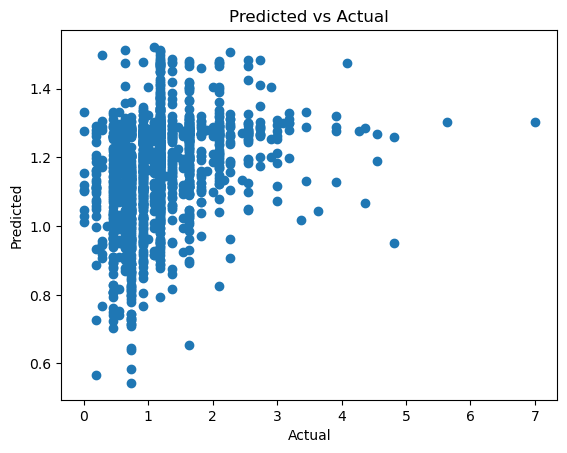

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(3, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': np.arange(1, X_train_scaled.shape[1]+1),
    'bootstrap': [True, False]
}

model = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                    cv=5, scoring='neg_mean_squared_error', random_state=42,
                                    n_iter= 2000, n_jobs=-1, verbose=1
                                )

random_search.fit(X_val_scaled, y_val)

best_params = random_search.best_params_
best_mse = -random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Mean Squared Error:", best_mse)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test):", mse)

Mean Squared Error (Test): 0.40068878319300744


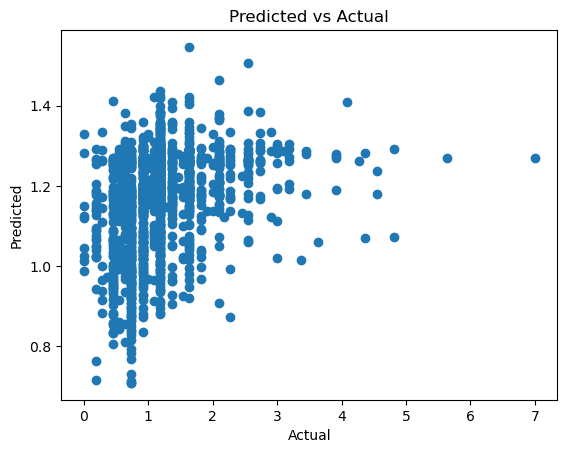

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()